In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-28 18:49.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

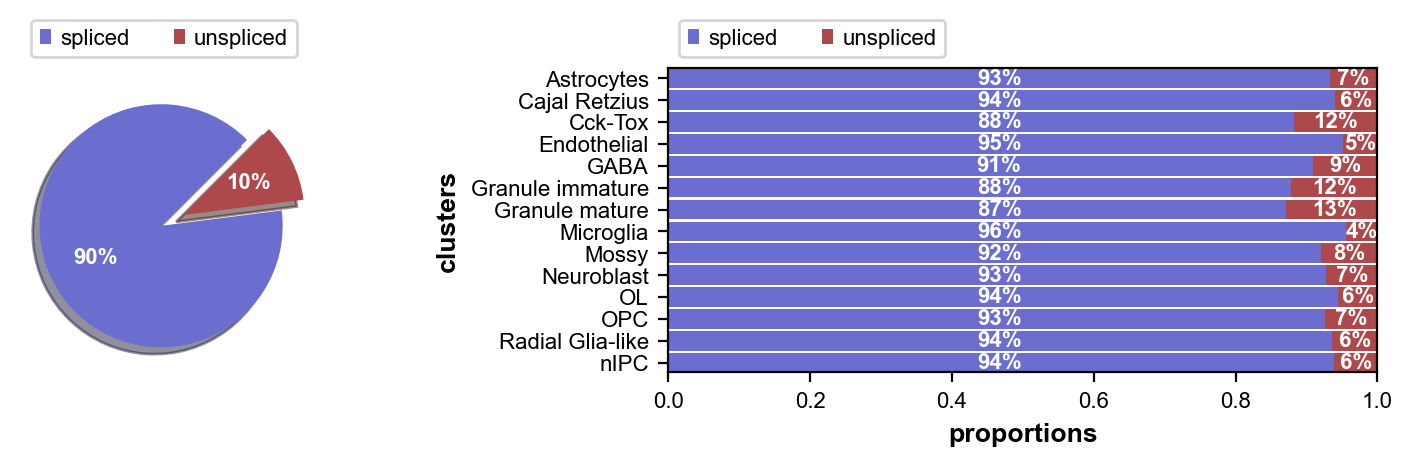

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=3000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 176 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:48) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [8]:
scv.tl.velocity(adata, mode='stochastic')
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index,Tcea1,Rb1cc1,Prex2,A830018L16Rik,Paqr8,Khdrbs2,Arhgef4,Unc50,Eif5b,Mrps9,...,Itm2a,Pcdh19,Tspan6,Bex2,Tceal5,Sms,Cnksr2,Zrsr2,Ofd1,Tmsb4x
index,,,,,,,,,,,,,,,,,,,,,
AAACATACCCATGA,-0.002556,-0.016877,-0.098767,-0.083454,0.000000,0.024333,0.002861,0.000543,0.011529,0.010379,...,0.000000e+00,0.003025,0.000134,0.000168,-0.000303,0.000497,-0.009784,0.002806,-0.003284,0.000033
AAACATACCGTAGT,0.004625,-0.032757,-0.341905,0.000000,-0.552715,-0.290555,-0.008002,-0.001891,-0.016488,0.004625,...,0.000000e+00,0.000000,0.000725,0.000094,0.000773,0.000000,0.000000,0.000845,0.000000,0.000005
AAACATACGAGAGC,-0.031514,-0.052100,-0.171861,0.163296,-0.041467,0.597003,0.004365,0.000550,0.008774,0.007334,...,0.000000e+00,0.000173,0.000294,0.000344,-0.008814,0.000682,-0.033661,0.004367,0.016496,0.000029
AAACATACTGAGGG,-0.007980,0.001751,-0.180484,-0.117112,0.000000,0.264278,0.000700,-0.000448,0.006543,0.000043,...,5.416655e-07,0.000580,0.000424,0.000078,0.001006,0.001419,-0.051462,-0.001225,0.000000,0.000026
AAACATTGGCATCA,-0.006962,0.003151,-0.325040,-0.050901,-0.008463,0.059479,0.006723,0.000003,0.006919,0.008061,...,0.000000e+00,0.003075,-0.000288,0.000227,0.002494,0.000395,-0.034938,0.004662,0.005727,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTTCCCGT,-0.004631,-0.001877,-0.123334,-0.042655,0.053776,0.140409,0.004060,0.000491,0.010404,-0.005783,...,5.977488e-06,0.000611,-0.000350,-0.000096,0.002862,0.000408,-0.047149,0.005208,0.013142,0.000051
TTTGACTGCCTGTC,-0.024424,-0.028181,-0.245851,-0.017717,0.018023,-0.747625,0.002394,0.000269,-0.007176,0.002875,...,0.000000e+00,0.000000,-0.002649,0.000177,-0.001123,0.000817,-0.037074,0.000831,0.014699,0.000037
TTTGACTGTCTGGA,-0.004931,-0.007103,-0.206176,0.024361,-0.074827,-0.179847,0.006250,-0.000463,0.007276,0.004906,...,0.000000e+00,0.002183,0.000118,0.000332,0.004477,0.000894,-0.056975,0.004727,0.001798,0.000017


In [9]:
adata.var['velocity_gamma']

index
Tcea1            0.206116
Rb1cc1           0.257441
Prex2            1.712708
A830018L16Rik    1.209741
Paqr8            1.627936
                   ...   
Sms              0.049017
Cnksr2           0.412921
Zrsr2            0.179782
Ofd1             0.578885
Tmsb4x           0.001172
Name: velocity_gamma, Length: 1824, dtype: float32

In [10]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:27) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:00) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


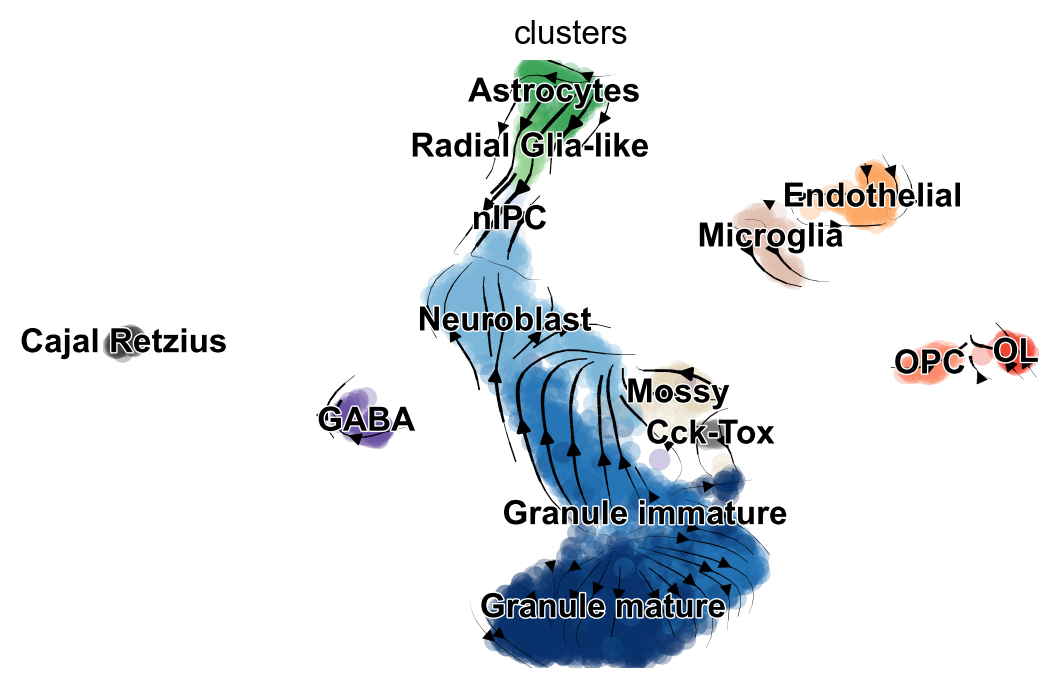

In [11]:
mc.acc_embedding_stream(adata,basis='umap')

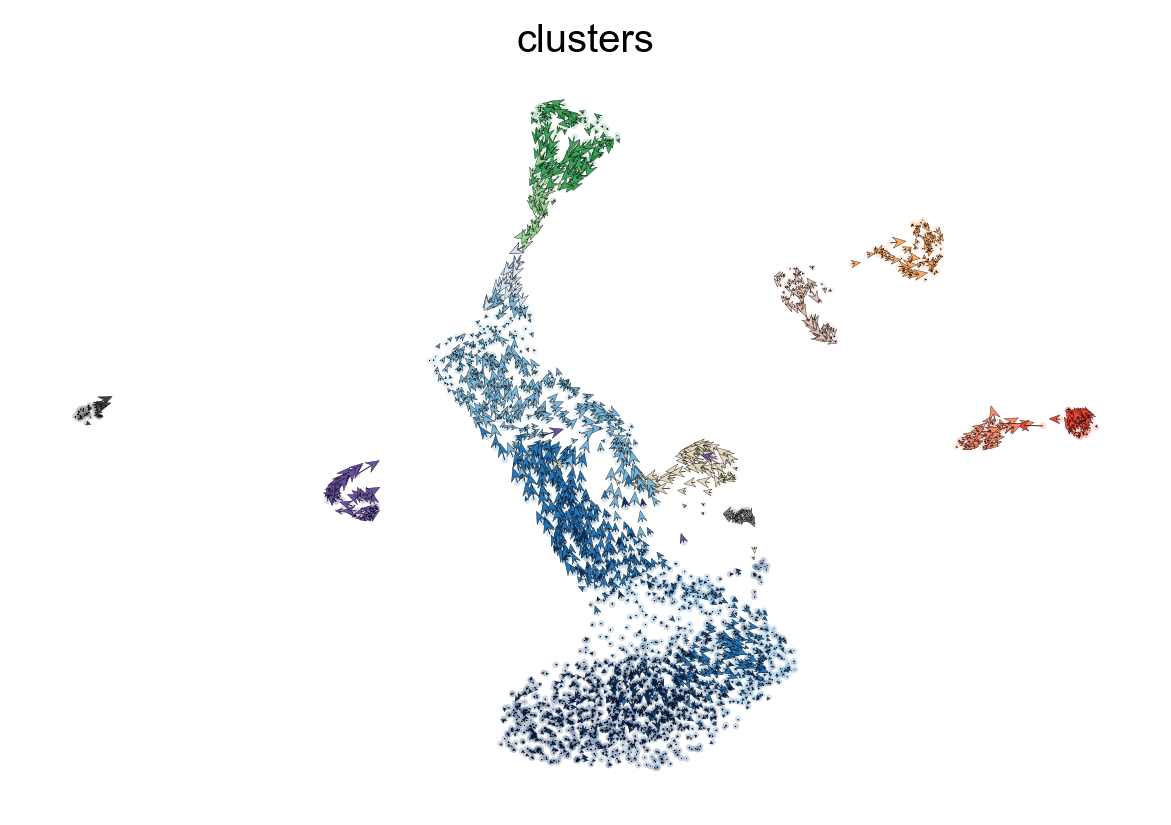

In [12]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

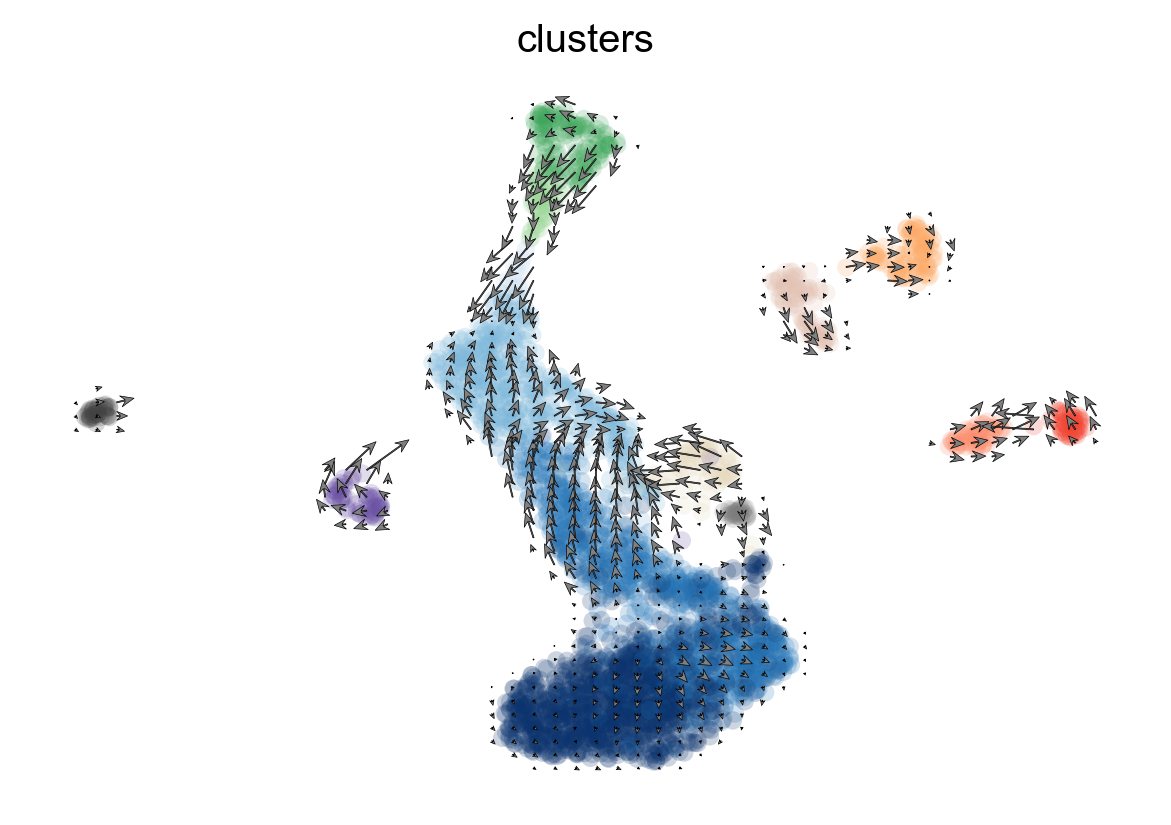

In [13]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

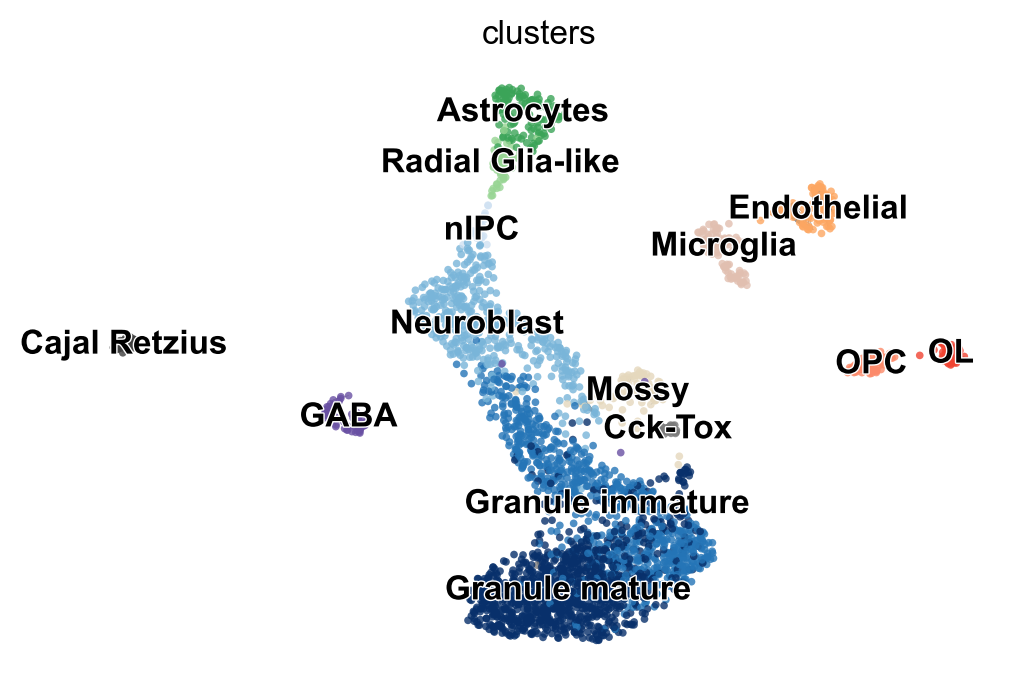

In [14]:
mc.acc_graph(adata)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


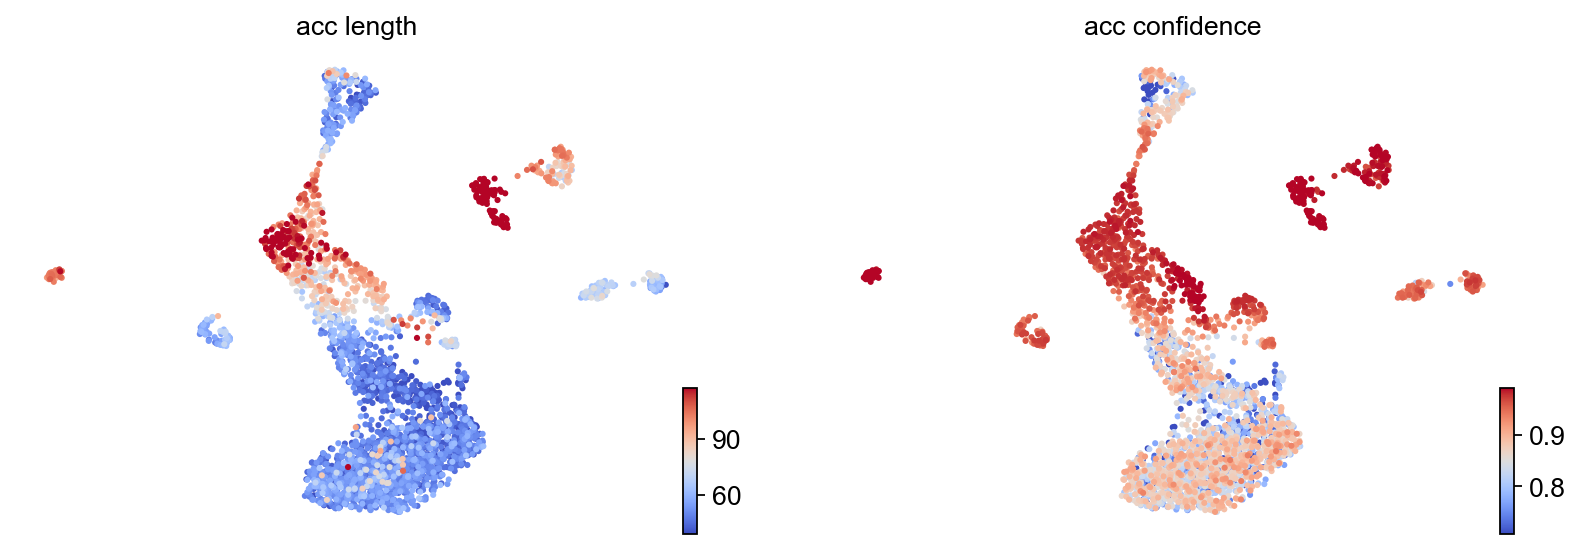

In [15]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

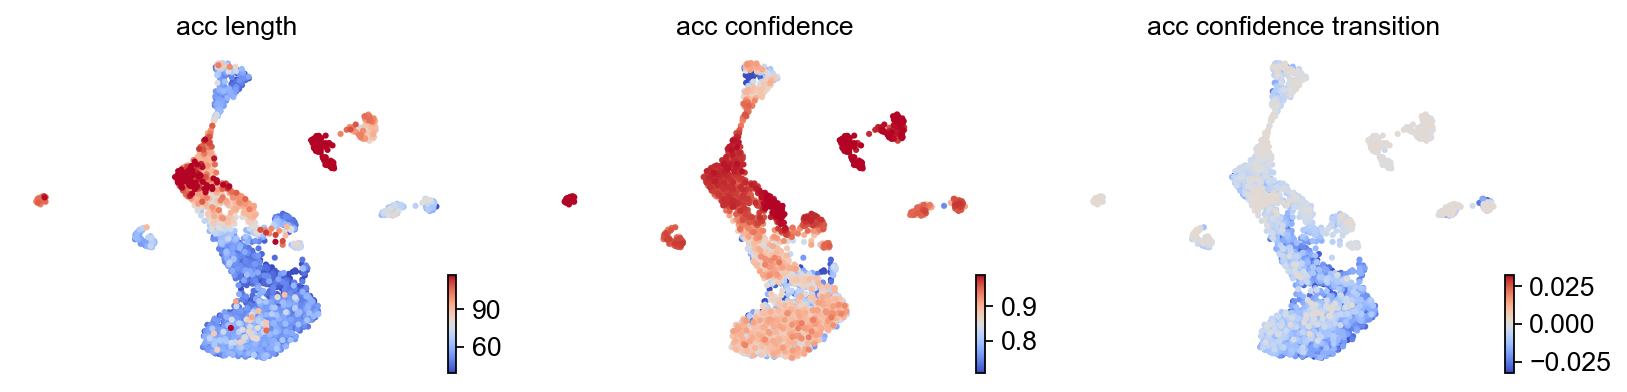

In [16]:
keys = 'acc_length', 'acc_confidence', 'acc_confidence_transition'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])